# PREDICCIÓN DE VENTAS DE LA POLLERÍA ‘LA PLAZA’ USANDO APRENDIZAJE SUPERVISADO, UBICADO EN SAN JERÓNIMO - 2023.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
ventas_abril = pd.read_csv('Reporte de ventas polleria la Plaza/Reporte_Abril.csv')
ventas_abril

,Porcion de producto,Mes de venta,Cantidad
0,Octavo de pollo,Abril,302.0
1,Cuarto de pollo,Abril,221.0
2,Medio pollo,Abril,269.0
3,Pollo entero,Abril,137.0
4,Extras,Abril,117.0


In [65]:
ventas_mayo = pd.read_csv('Reporte de ventas polleria la Plaza/Reporte_Mayo.csv')
ventas_mayo

,Porcion de producto,Mes de venta,Cantidad
0,Octavo de pollo,Mayo,296.0
1,Cuarto de pollo,Mayo,228.0
2,Medio pollo,Mayo,279.0
3,Pollo entero,Mayo,145.0
4,Extras,Mayo,111.0


In [66]:
ventas_junio = pd.read_csv('Reporte de ventas polleria la Plaza/Reporte_Junio.csv')
ventas_junio

,Porcion de producto,Mes de venta,Cantidad
0,Octavo de pollo,Junio,320.0
1,Cuarto de pollo,Junio,222.0
2,Medio pollo,Junio,264.0
3,Pollo entero,Junio,141.0
4,Extras,Junio,104.0


In [67]:
ventas_julio = pd.read_csv('Reporte de ventas polleria la Plaza/Reporte_Julio.csv')
ventas_julio

,Porcion de producto,Mes de venta,Cantidad
0,Octavo de pollo,Julio,286.0
1,Cuarto de pollo,Julio,235.0
2,Medio pollo,Julio,290.0
3,Pollo entero,Julio,121.0
4,Extras,Julio,119.0


#### Veremos la cantidad de filas y columnas de nuestro dataset

In [37]:
print(ventas_abril.shape)
print(ventas_mayo.shape)
print(ventas_junio.shape)
print(ventas_julio.shape)

(5, 3)
(5, 3)
(5, 3)
(5, 3)


# LIMPIEZA

In [68]:
#Verificamos la cantidad de datos nulos en las columnas del dataset
pd.isnull(ventas_abril).sum()

Porcion de producto    0
Mes de venta           0
Cantidad               0
dtype: int64

In [69]:
pd.isnull(ventas_mayo).sum()

Porcion de producto    0
Mes de venta           0
Cantidad               0
dtype: int64

In [70]:
pd.isnull(ventas_junio).sum()

Porcion de producto    0
Mes de venta           0
Cantidad               0
dtype: int64

In [71]:
pd.isnull(ventas_julio).sum()

Porcion de producto    0
Mes de venta           0
Cantidad               0
dtype: int64

# ESTANDARIZACION

In [72]:
ventas_julio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Porcion de producto  5 non-null      object 
 1   Mes de venta         5 non-null      object 
 2   Cantidad             5 non-null      float64
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


In [74]:
#Cambiar tipo el tipo de dato a entero
#En este caso, se está convirtiendo la columna "Cantidad" de tipo "float64" a tipo "int64".
ventas_abril['Cantidad'] = ventas_abril['Cantidad'].astype('int64')
ventas_mayo['Cantidad'] = ventas_mayo['Cantidad'].astype('int64')
ventas_junio['Cantidad'] = ventas_junio['Cantidad'].astype('int64')
ventas_julio['Cantidad'] = ventas_julio['Cantidad'].astype('int64')

#Poner en mayúsculas
ventas_abril['Porcion de producto'] = ventas_abril['Porcion de producto'].str.upper()
ventas_mayo['Porcion de producto'] = ventas_mayo['Porcion de producto'].str.upper()
ventas_junio['Porcion de producto'] = ventas_junio['Porcion de producto'].str.upper()
ventas_julio['Porcion de producto'] = ventas_julio['Porcion de producto'].str.upper()



In [75]:
#CONCATENAMOS
# Se crea un DataFrame vacío llamado df_ventas
df_ventas = pd.DataFrame()

# Se concatena el DataFrame ventas_mayo con el DataFrame df_ventas
# Los datos de ventas_abril se agregan al principio de df_ventas
df_ventas = pd.concat([ventas_abril, df_ventas])
df_ventas = pd.concat([ventas_mayo, df_ventas])
df_ventas = pd.concat([ventas_junio, df_ventas])
df_ventas = pd.concat([ventas_julio, df_ventas])
df_ventas

,Porcion de producto,Mes de venta,Cantidad
0,OCTAVO DE POLLO,Julio,286
1,CUARTO DE POLLO,Julio,235
2,MEDIO POLLO,Julio,290
3,POLLO ENTERO,Julio,121
4,EXTRAS,Julio,119
0,OCTAVO DE POLLO,Junio,320
1,CUARTO DE POLLO,Junio,222
2,MEDIO POLLO,Junio,264
3,POLLO ENTERO,Junio,141
4,EXTRAS,Junio,104


In [76]:
#Reemplazar los meses por sus representativos en numeros
df_ventas['Mes de venta'].replace(['Abril', 'Mayo', 'Junio', 'Julio'],[4,5,6,7],inplace=True)#inplace=True el DataFrame original se modifica directamente, y la operación de reemplazo se lleva a cabo "en su lugar 
df_ventas

,Porcion de producto,Mes de venta,Cantidad
0,OCTAVO DE POLLO,7,286
1,CUARTO DE POLLO,7,235
2,MEDIO POLLO,7,290
3,POLLO ENTERO,7,121
4,EXTRAS,7,119
0,OCTAVO DE POLLO,6,320
1,CUARTO DE POLLO,6,222
2,MEDIO POLLO,6,264
3,POLLO ENTERO,6,141
4,EXTRAS,6,104


In [77]:
#ordena
df_ventas = df_ventas.sort_values(by='Porcion de producto')
df_ventas

,Porcion de producto,Mes de venta,Cantidad
1,CUARTO DE POLLO,7,235
1,CUARTO DE POLLO,4,221
1,CUARTO DE POLLO,5,228
1,CUARTO DE POLLO,6,222
4,EXTRAS,6,104
4,EXTRAS,5,111
4,EXTRAS,4,117
4,EXTRAS,7,119
2,MEDIO POLLO,6,264
2,MEDIO POLLO,5,279


#### haremos una grafica

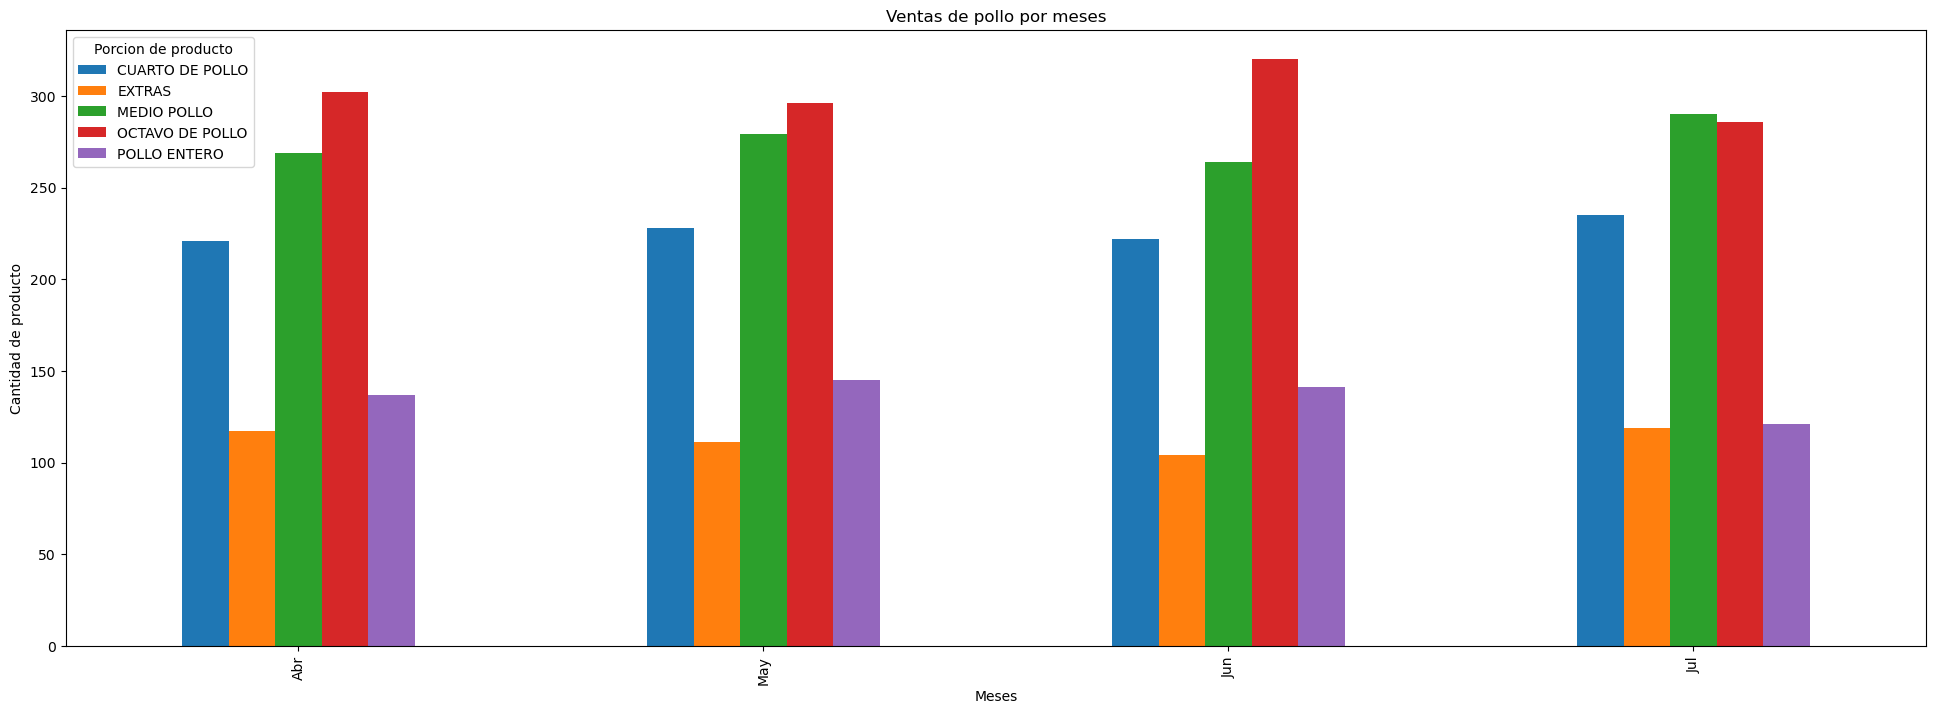

In [78]:
#Mostramos la cantidad de productos vendidos durante los mese abril, mayo, junio y julio
df_datos = df_ventas.pivot_table(index='Mes de venta', columns='Porcion de producto', values='Cantidad', aggfunc='sum')#pivot_table()de pandas para crear una tabla dinámica
    
# Creamos el gráfico de barras
graf_barras = df_datos.plot(kind='bar', figsize=(24, 8))

# Configuramos las etiquetas y el título del gráfico
graf_barras.set_xticklabels(['Abr', 'May', 'Jun', 'Jul'])
graf_barras.set_xlabel('Meses')
graf_barras.set_ylabel('Cantidad de producto')
graf_barras.set_title(f'Ventas de pollo por meses')

# Mostrar el gráfico
plt.show()
    

In [79]:

#get_dummies()para transformar la columna "Porción de producto" en variables dummy.

# El método pd.get_dummies()crea nuevas columnas en el DataFrame para cada valor único 
# en la columna "Porción de producto". Cada nueva columna será una variable dummy que toma
# el valor 1 si el producto corresponde al nombre de esa columna, y 0 si no lo es.
df_ventas = pd.get_dummies(df_ventas, columns=['Porcion de producto'])
df_ventas

,Mes de venta,Cantidad,Porcion de producto_CUARTO DE POLLO,Porcion de producto_EXTRAS,Porcion de producto_MEDIO POLLO,Porcion de producto_OCTAVO DE POLLO,Porcion de producto_POLLO ENTERO
1,7,235,1,0,0,0,0
1,4,221,1,0,0,0,0
1,5,228,1,0,0,0,0
1,6,222,1,0,0,0,0
4,6,104,0,1,0,0,0
4,5,111,0,1,0,0,0
4,4,117,0,1,0,0,0
4,7,119,0,1,0,0,0
2,6,264,0,0,1,0,0
2,5,279,0,0,1,0,0


# NORMALIZACION


In [80]:

from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()

df_ventas["Cantidad"] = escalador.fit_transform(df_ventas[["Cantidad"]])
df_ventas

,Mes de venta,Cantidad,Porcion de producto_CUARTO DE POLLO,Porcion de producto_EXTRAS,Porcion de producto_MEDIO POLLO,Porcion de producto_OCTAVO DE POLLO,Porcion de producto_POLLO ENTERO
1,7,0.606481,1,0,0,0,0
1,4,0.541667,1,0,0,0,0
1,5,0.574074,1,0,0,0,0
1,6,0.546296,1,0,0,0,0
4,6,0.000000,0,1,0,0,0
4,5,0.032407,0,1,0,0,0
4,4,0.060185,0,1,0,0,0
4,7,0.069444,0,1,0,0,0
2,6,0.740741,0,0,1,0,0
2,5,0.810185,0,0,1,0,0


# MODELO

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#Dividir datos para las pruebas y para el entrenamiento del dataset general
X = df_ventas.drop(['Cantidad'], axis=1)
y = df_ventas['Cantidad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Regresión lineal

In [85]:

modelo_r_lineal = LinearRegression()
modelo_r_lineal.fit(X_train, y_train)

p_rlineal = modelo_r_lineal.predict(X_test)

In [86]:
mse = mean_squared_error(y_test, p_rlineal)
r2 = r2_score(y_test, p_rlineal)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.003073619208199957
Coeficiente de determinación (R^2): 0.9499935827115831


#### Árboles de decisión

In [87]:
modelo_a_decision = DecisionTreeRegressor()
modelo_a_decision.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
p_adecision = modelo_a_decision.predict(X_test)

In [88]:
# Evaluar el modelo utilizando MSE y R^2
mse = mean_squared_error(y_test, p_adecision)
r2 = r2_score(y_test, p_adecision)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.007705332647462279
Coeficiente de determinación (R^2): 0.8746376653662576


In [89]:
pd.DataFrame({
    'Regresión lineal': escalador.inverse_transform(p_rlineal.reshape(-1, 1)).round().astype(int).flatten().tolist(),
    'Árboles de decisión': escalador.inverse_transform(p_adecision.reshape(-1, 1)).round().astype(int).flatten().tolist(),
    'Valor real': escalador.inverse_transform(y_test.values.reshape(-1, 1)).round().astype(int).flatten(),
})

,Regresión lineal,Árboles de decisión,Valor real
0,227,222,235
1,134,145,137
2,308,320,286
3,224,228,221


# PREDICCIONES CON DATOS NUEVOS

In [90]:
mes_predecir = 8

df_prediccion = {
    'Porcion de producto': ['OCTAVO DE POLLO', 'CUARTO DE POLLO', 'MEDIO POLLO', 'POLLO ENTERO', 'EXTRAS'],
    'Mes de venta': mes_predecir, 
}

df_prediccion = pd.DataFrame(df_prediccion)
df_prediccion

,Porcion de producto,Mes de venta
0,OCTAVO DE POLLO,8
1,CUARTO DE POLLO,8
2,MEDIO POLLO,8
3,POLLO ENTERO,8
4,EXTRAS,8


In [91]:
df_prediccion = pd.get_dummies(df_prediccion, columns=['Porcion de producto'])
df_prediccion

,Mes de venta,Porcion de producto_CUARTO DE POLLO,Porcion de producto_EXTRAS,Porcion de producto_MEDIO POLLO,Porcion de producto_OCTAVO DE POLLO,Porcion de producto_POLLO ENTERO
0,8,0,0,0,1,0
1,8,1,0,0,0,0
2,8,0,0,1,0,0
3,8,0,0,0,0,1
4,8,0,1,0,0,0


In [92]:
nueva_prediccion = modelo_r_lineal.predict(df_prediccion)
nueva_prediccion = escalador.inverse_transform(nueva_prediccion.reshape(-1, 1)).round().astype(int).flatten()

In [93]:
df_prediccion = pd.DataFrame({
    'Porcion de producto': ['OCTAVO DE POLLO', 'CUARTO DE POLLO', 'MEDIO POLLO', 'POLLO ENTERO', 'EXTRAS'],
    'Mes prediccion': mes_predecir,
    'Cantidad predecida': nueva_prediccion
})

df_prediccion

,Porcion de producto,Mes prediccion,Cantidad predecida
0,OCTAVO DE POLLO,8,309
1,CUARTO DE POLLO,8,228
2,MEDIO POLLO,8,278
3,POLLO ENTERO,8,138
4,EXTRAS,8,115


In [94]:
df_prediccion.to_excel(f'Resultados predicciones/Prediccion ventas mes {mes_predecir}.xlsx')